In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X = data.data
y = data.target



In [23]:
from sklearn.model_selection import ShuffleSplit
ss= ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8, random_state=8)

train_index, test_index = next(ss.split(X, y))

X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]


In [24]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
scale.fit(X_train)

X_train =scale.transform(X_train)
X_test =scale.transform(X_test)


In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.C = 1
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.9649122807017544

In [26]:


clf.C = 100
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.9824561403508771

In [27]:
clf

LogisticRegression(C=100)

In [28]:
C_range_exp = np.arange(-15.0, 21.0)

C_range = 10 ** C_range_exp


In [29]:
C_range

array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])

In [30]:
C_range[3]

1e-12

In [31]:
from sklearn.model_selection import GridSearchCV

param = {'C': C_range}

gs = GridSearchCV(clf, param)
gs.fit(X_train, y_train)


/home/ma/.bin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ma/.bin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

GridSearchCV(estimator=LogisticRegression(C=100),
             param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])})

In [32]:
gs

GridSearchCV(estimator=LogisticRegression(C=100),
             param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])})

In [33]:
gs.cv_results_

{'mean_fit_time': array([0.00196037, 0.0020112 , 0.00149646, 0.00135331, 0.00190873,
        0.00158401, 0.00479941, 0.00523739, 0.00433459, 0.00406837,
        0.00359836, 0.00347276, 0.00279508, 0.00274563, 0.00397725,
        0.00497437, 0.00784683, 0.01605306, 0.02361503, 0.0240612 ,
        0.0249465 , 0.02466488, 0.02342548, 0.02414498, 0.02234612,
        0.02147989, 0.01882672, 0.02024803, 0.01914401, 0.01977506,
        0.0198144 , 0.01965532, 0.02040596, 0.01922636, 0.01925416,
        0.01922631]),
 'std_fit_time': array([3.53019607e-04, 4.39141694e-04, 2.15347949e-04, 7.64693390e-05,
        3.30524842e-04, 2.26264653e-04, 4.68385308e-04, 9.59529988e-04,
        3.30101198e-04, 4.47999866e-04, 1.54620402e-04, 1.70853582e-04,
        7.70192538e-05, 5.25354676e-05, 3.56464892e-04, 4.53961171e-04,
        1.37705267e-03, 2.04132378e-03, 3.39910772e-04, 1.25085663e-03,
        1.56695474e-03, 2.30977530e-03, 4.62223092e-04, 1.81378561e-03,
        4.30318894e-03, 4.58944530e-0

In [34]:
gs.best_estimator_, gs.best_params_, gs.best_score_

(LogisticRegression(C=10.0), {'C': 10.0}, 0.9758241758241759)

In [35]:
clf_best = gs.best_estimator_

clf_best.score(X_test, y_test)


0.9736842105263158

100

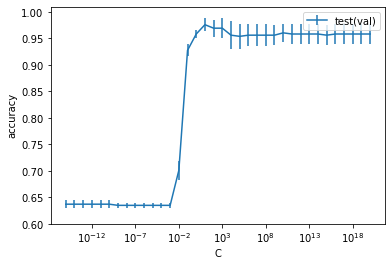

In [38]:
#plt.errorbar(gs.cv_results_['param_C'].data,
#            gs.cv_results_['mean_train_score'],
 #           label='Training')
plt.errorbar(gs.cv_results_['param_C'].data,
            gs.cv_results_['mean_test_score'],
            yerr=gs.cv_results_['std_test_score'],
            label="test(val)")

plt.ylim(.6, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(loc="best")


In [37]:
gs.cv_results_

{'mean_fit_time': array([0.00196037, 0.0020112 , 0.00149646, 0.00135331, 0.00190873,
        0.00158401, 0.00479941, 0.00523739, 0.00433459, 0.00406837,
        0.00359836, 0.00347276, 0.00279508, 0.00274563, 0.00397725,
        0.00497437, 0.00784683, 0.01605306, 0.02361503, 0.0240612 ,
        0.0249465 , 0.02466488, 0.02342548, 0.02414498, 0.02234612,
        0.02147989, 0.01882672, 0.02024803, 0.01914401, 0.01977506,
        0.0198144 , 0.01965532, 0.02040596, 0.01922636, 0.01925416,
        0.01922631]),
 'std_fit_time': array([3.53019607e-04, 4.39141694e-04, 2.15347949e-04, 7.64693390e-05,
        3.30524842e-04, 2.26264653e-04, 4.68385308e-04, 9.59529988e-04,
        3.30101198e-04, 4.47999866e-04, 1.54620402e-04, 1.70853582e-04,
        7.70192538e-05, 5.25354676e-05, 3.56464892e-04, 4.53961171e-04,
        1.37705267e-03, 2.04132378e-03, 3.39910772e-04, 1.25085663e-03,
        1.56695474e-03, 2.30977530e-03, 4.62223092e-04, 1.81378561e-03,
        4.30318894e-03, 4.58944530e-0

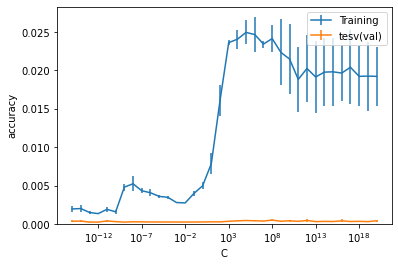

In [40]:
plt.errorbar(gs.cv_results_['param_C'].data,
            gs.cv_results_['mean_fit_time'],
            yerr=gs.cv_results_['std_fit_time'], label='Training')

plt.errorbar(gs.cv_results_['param_C'].data,
            gs.cv_results_['mean_score_time'],yerr=gs.cv_results_['std_score_time'],
            label="tesv(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(loc="best")
